In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [37]:
df=pd.read_csv('Amazon Customer Behavior Survey.csv')
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,6/4/2023,16,Female,Less than once a month,Clothing and Fashion,No,Few times a month,categories,Multiple pages,2,...,Often,No,Moderately,Yes,3,Yes,2,2,Wide product selection,Shipping speed and reliability
1,6/4/2023,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,Keyword,Multiple pages,1,...,Rarely,Yes,Heavily,Yes,3,Sometimes,1,1,Competitive prices,Customer service responsiveness
2,6/4/2023,24,Female,Multiple times a week,Groceries and Gourmet Food,Yes,Few times a week,categories,Multiple pages,1,...,Sometimes,Yes,Moderately,No,2,No,2,3,User-friendly website/app interface,Product quality and accuracy
3,6/4/2023,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Few times a week,Keyword,Multiple pages,1,...,Often,No,Heavily,Yes,3,Sometimes,2,2,Wide product selection,Shipping speed and reliability
4,6/4/2023,23,Female,Less than once a month,Beauty and Personal Care,No,Few times a month,categories,Multiple pages,4,...,Rarely,No,Occasionally,Sometimes,3,Yes,3,5,Wide product selection,Reducing packaging waste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,6/12/2023,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
575,6/12/2023,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
576,6/12/2023,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
577,6/12/2023,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [38]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [39]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [40]:
df.drop(['Timestamp'],inplace=True,axis=1)
df

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,16,Female,Less than once a month,Clothing and Fashion,No,Few times a month,categories,Multiple pages,2,Yes,...,Often,No,Moderately,Yes,3,Yes,2,2,Wide product selection,Shipping speed and reliability
1,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,Keyword,Multiple pages,1,Maybe,...,Rarely,Yes,Heavily,Yes,3,Sometimes,1,1,Competitive prices,Customer service responsiveness
2,24,Female,Multiple times a week,Groceries and Gourmet Food,Yes,Few times a week,categories,Multiple pages,1,Maybe,...,Sometimes,Yes,Moderately,No,2,No,2,3,User-friendly website/app interface,Product quality and accuracy
3,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Few times a week,Keyword,Multiple pages,1,Yes,...,Often,No,Heavily,Yes,3,Sometimes,2,2,Wide product selection,Shipping speed and reliability
4,23,Female,Less than once a month,Beauty and Personal Care,No,Few times a month,categories,Multiple pages,4,Yes,...,Rarely,No,Occasionally,Sometimes,3,Yes,3,5,Wide product selection,Reducing packaging waste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
575,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
576,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
577,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [41]:
df=df.dropna()

In [42]:
df1=df.copy()

In [43]:
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [44]:
#chia độ tuổi thành các danh mục khác nhau
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

# Tạo một cột mới 'Danh mục tuổi' với các danh mục tuổi được nhóm
df["age"] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [45]:
df.dtypes

age                                       category
Gender                                      object
Purchase_Frequency                          object
Purchase_Categories                         object
Personalized_Recommendation_Frequency       object
Browsing_Frequency                          object
Product_Search_Method                       object
Search_Result_Exploration                   object
Customer_Reviews_Importance                  int64
Add_to_Cart_Browsing                        object
Cart_Completion_Frequency                   object
Cart_Abandonment_Factors                    object
Saveforlater_Frequency                      object
Review_Left                                 object
Review_Reliability                          object
Review_Helpfulness                          object
Personalized_Recommendation_Frequency        int64
Recommendation_Helpfulness                  object
Rating_Accuracy                              int64
Shopping_Satisfaction          

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["age","Gender","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]
for i in lst:
  df[i]=le.fit_transform(df[i])

In [47]:
# chuyển đổi các biến phân loại thành các giá trị số. 
df.dtypes

age                                       int32
Gender                                    int32
Purchase_Frequency                        int32
Purchase_Categories                       int32
Personalized_Recommendation_Frequency     int32
Browsing_Frequency                        int32
Product_Search_Method                     int32
Search_Result_Exploration                 int32
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int32
Cart_Completion_Frequency                 int32
Cart_Abandonment_Factors                  int32
Saveforlater_Frequency                    int32
Review_Left                               int32
Review_Reliability                        int32
Review_Helpfulness                        int32
Personalized_Recommendation_Frequency     int64
Recommendation_Helpfulness                int32
Rating_Accuracy                           int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

Exploratory Data Analysis
Calculating features having high correlation

In [48]:
# Tính ma trận tương quan
correlation_matrix = df.corr()

# Tìm các đặc trưng có độ tương quan cao
threshold = 0.5  # Điều chỉnh ngưỡng khi cần thiết
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# In các tính năng có mối tương quan cao
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Shopping_Satisfaction and Rating_Accuracy  are highly correlated.


Tính toán các đặc trưng có độ tương quan thấp

In [49]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

# Tìm các tính năng có độ tương quan thấp
threshold = 0.0009  # Điều chỉnh ngưỡng khi cần thiết
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# In các đặc điểm có độ tương quan thấp
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Purchase_Frequency and Product_Search_Method are low correlated.
Product_Search_Method and Purchase_Frequency are low correlated.


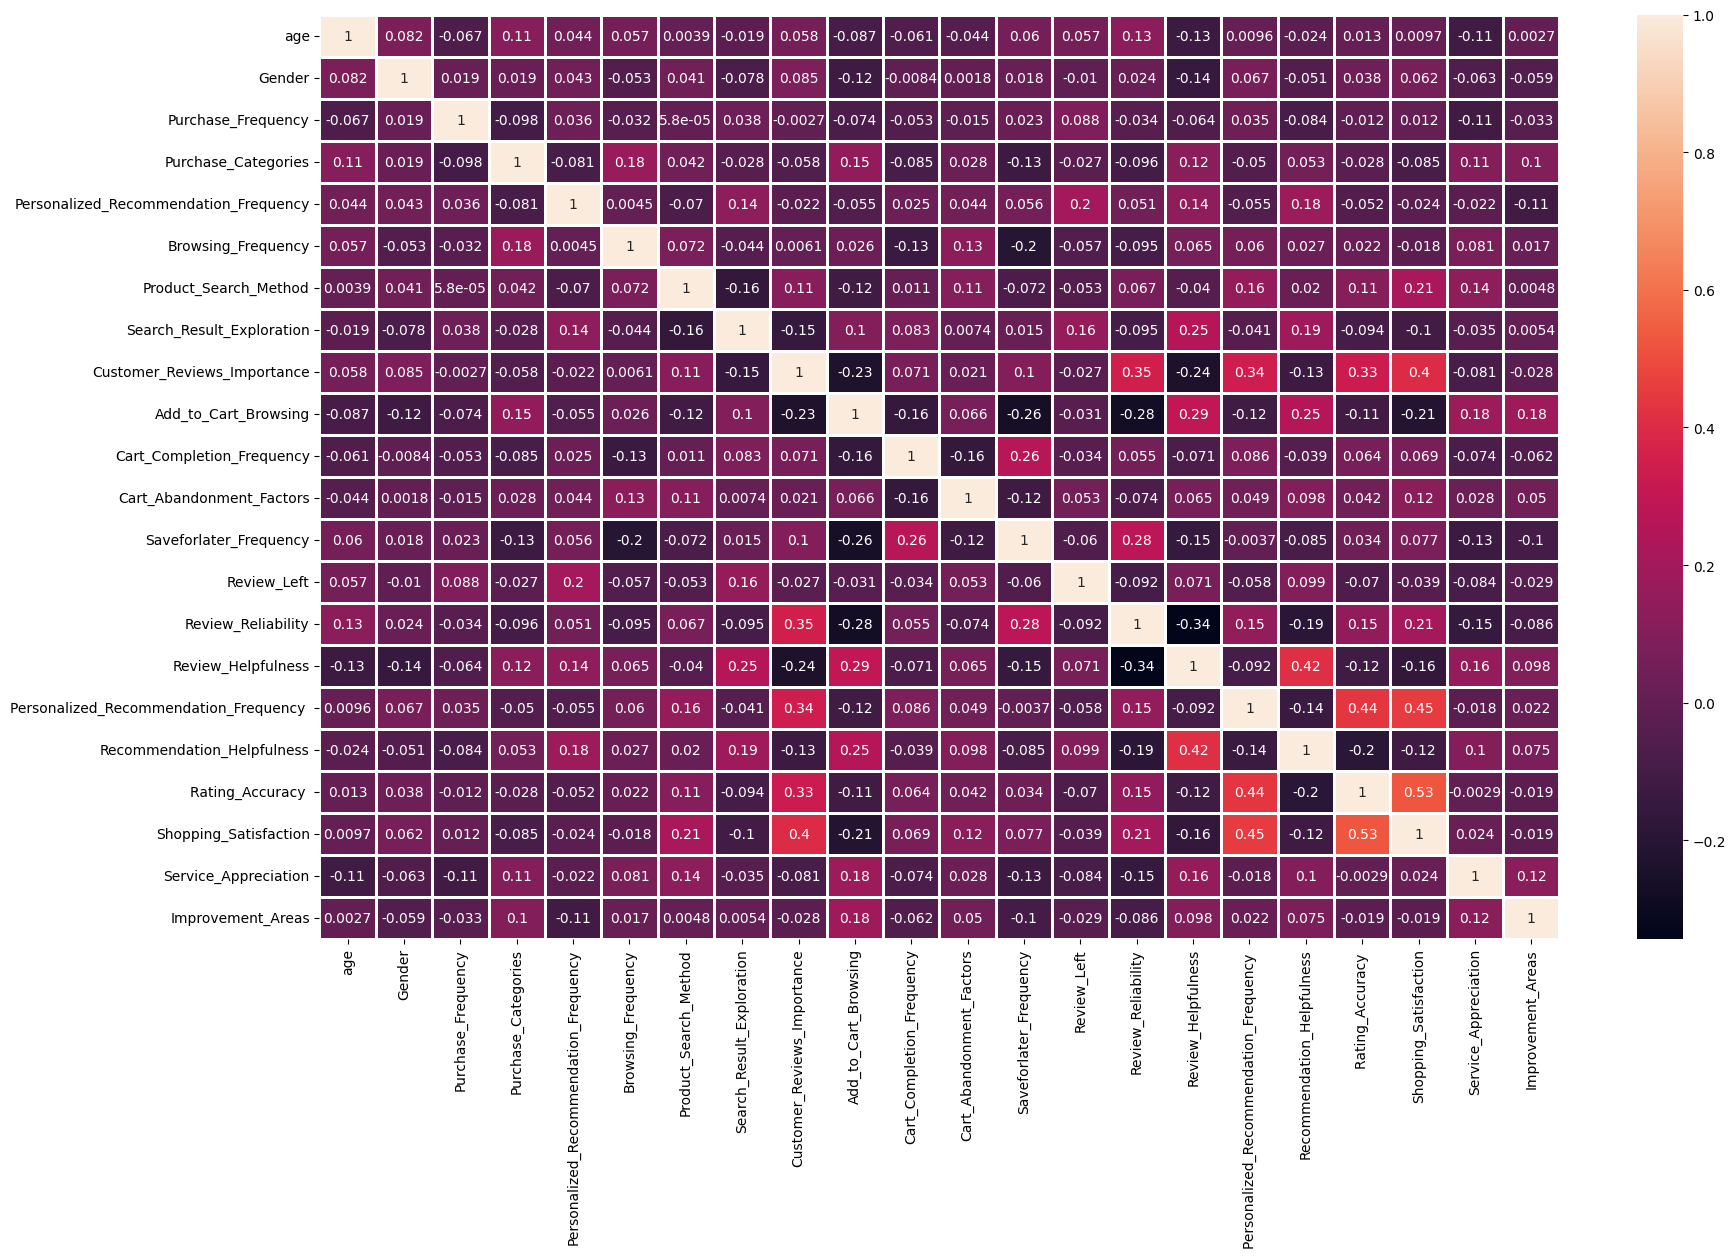

In [50]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

<Axes: xlabel='Review_Reliability', ylabel='count'>

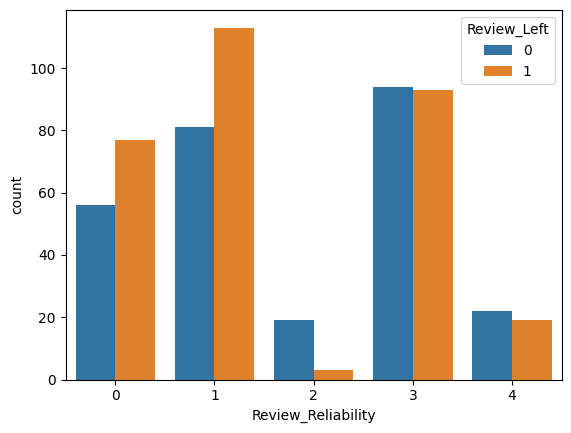

In [51]:
sns.countplot(x='Review_Reliability',data=df,hue='Review_Left')

0 đại diện cho những người chưa để lại đánh giá nào và 1 đại diện cho những người đã để lại đánh giá

những người tiếp tục đánh giá có phạm vi "Rất hài lòng", "Hài lòng", "Trung bình", "Không hài lòng" và "Rất không hài lòng"

Dựa trên biểu đồ, có vẻ như những cá nhân hài lòng với sản phẩm hoặc dịch vụ có nhiều khả năng để lại đánh giá hơn. Biểu đồ cho thấy những người đánh giá trải nghiệm của họ là "Rất hài lòng" hoặc "Hài lòng" có tần suất để lại đánh giá cao hơn. Mặt khác, những cá nhân không hài lòng hoặc có ý kiến ​​trung bình sẽ ít để lại đánh giá hơn.

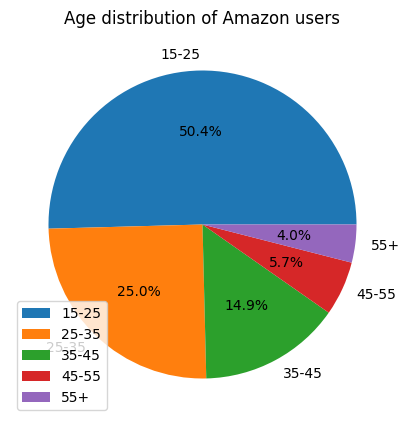

In [52]:
# Age distribution
y=df['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of Amazon users')
plt.show()

Dựa trên biểu đồ, có thể suy ra rằng các cá nhân trong độ tuổi 0-20 có mức độ tương tác người dùng cao hơn so với các nhóm tuổi khác. Điều này ngụ ý rằng các cá nhân trong độ tuổi này tham gia nhiều hơn

<Axes: xlabel='Purchase_Frequency', ylabel='count'>

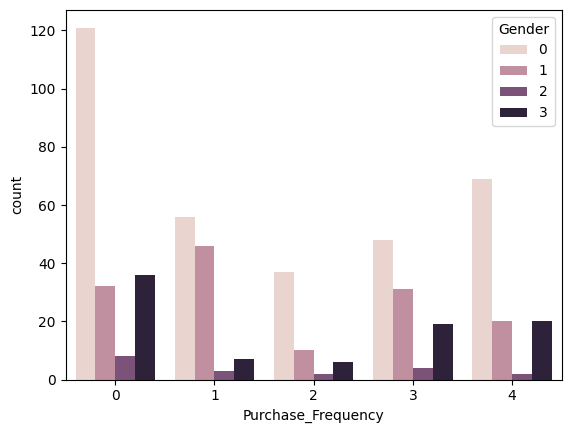

In [53]:
# plan
sns.countplot(x='Purchase_Frequency',data=df,hue='Gender')

0 đại diện cho những người xác định là nữ,1 đại diện cho những người xác định là nam,2 đại diện cho những người không muốn nói về giới tính của mình,3 đại diện cho những người xác định thuộc giới tính khác. Tần suất duyệt web được phân loại là"Nhiều lần trong ngày", " Nhiều lần một tuần, "Vài lần một tháng", "Mỗi tháng một lần" và "Ít hơn một lần một tháng". Dân số nữ ở đây tích cực mua hàng hơn các giới tính khác

Lựa chọn tính năng

In [54]:
X=df.drop(["Recommendation_Helpfulness"],axis=1)
y=df.iloc[:,-5]

In [55]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
1    260
0    168
2    149
Name: count, dtype: int64

Chọn các đặc điểm tốt nhất để phân loại bằng ANOVA

In [56]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Lấy chỉ số đặc trưng đã chọn
feature_indices = selector.get_support(indices=True)

# Lấy tên của các tính năng đã chọn
selected_features = X.columns[feature_indices]

# Tạo DataFrame mới chỉ với các tính năng đã chọn
selected_data = df[selected_features]
# In các tính năng đã chọn
print(selected_features)

Index(['Personalized_Recommendation_Frequency', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')


In [57]:
xnew=df.drop(['age', 'Gender','Purchase_Frequency', 'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method', 'Customer_Reviews_Importance','Cart_Abandonment_Factors', 'Saveforlater_Frequency','Recommendation_Helpfulness',"Service_Appreciation","Improvement_Areas"],axis=1)

In [59]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(xnew,y)


In [60]:
#chuẩn hóa dữ liệu về khoảng giá trị từ 0 đến 1
# minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.  , 1.  , 1.  , ..., 0.5 , 0.25, 0.25],
       [0.  , 1.  , 0.  , ..., 0.5 , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.25, 0.25, 0.5 ],
       ...,
       [0.5 , 1.  , 0.  , ..., 0.  , 0.25, 0.  ],
       [0.  , 1.  , 1.  , ..., 0.  , 0.25, 0.25],
       [1.  , 1.  , 1.  , ..., 0.75, 0.75, 0.75]])

In [61]:
# chia nhỏ để kiểm tra và huấn luyện dữ liệu
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

# Xây dựng mô hình

K Nearest Neighbors
Phần 1: Mô hình KNN cơ bản

In [62]:

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
knn.fit(X_train, y_train)

# Dự đoán kết quả trên dữ liệu kiểm tra
y_pred = knn.predict(X_test)

Phần 2: Tinh chỉnh siêu tham số cho KNN sử dụng GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
# In ra siêu tham số tốt nhất tìm được
print(clf.best_params_)

# Sử dụng siêu tham số tốt nhất để khởi tạo mô hình KNN mới
best_params = clf.best_params_
knn1 = KNeighborsClassifier(**best_params)

# Huấn luyện mô hình KNN mới trên dữ liệu huấn luyện
knn1.fit(X_train, y_train)

# Dự đoán kết quả trên dữ liệu kiểm tra với mô hình KNN đã tinh chỉnh
y_pred1 = knn1.predict(X_test)

# In ra báo cáo đánh giá mô hình trên dữ liệu kiểm tra
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        26
           1       0.75      0.43      0.55        28
           2       0.64      0.88      0.74        24

    accuracy                           0.64        78
   macro avg       0.66      0.65      0.63        78
weighted avg       0.66      0.64      0.63        78



SVC

In [68]:
#Khởi tạo và huấn luyện mô hình SVC
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
#Dự đoán với mô hình SVC đã huấn luyện
y_pred2=sv.predict(X_test)
y_pred2

array([2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0])

In [69]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.83      0.54      0.65        28
           2       0.65      0.83      0.73        24

    accuracy                           0.71        78
   macro avg       0.72      0.71      0.70        78
weighted avg       0.73      0.71      0.70        78



Gaussian NB

In [70]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0])

In [71]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        26
           1       0.60      0.54      0.57        28
           2       0.55      0.67      0.60        24

    accuracy                           0.58        78
   macro avg       0.58      0.58      0.58        78
weighted avg       0.58      0.58      0.58        78



Decision tree

In [72]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2,
       2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0])

In [73]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        26
           1       0.59      0.46      0.52        28
           2       0.58      0.58      0.58        24

    accuracy                           0.58        78
   macro avg       0.58      0.58      0.57        78
weighted avg       0.58      0.58      0.57        78



RandomForest Classifier

In [74]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0])

In [75]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.70      0.57      0.63        28
           2       0.69      0.83      0.75        24

    accuracy                           0.69        78
   macro avg       0.69      0.70      0.69        78
weighted avg       0.69      0.69      0.69        78



xgboost

In [76]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
y_pred7

array([1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.68      0.46      0.55        28
           2       0.68      0.88      0.76        24

    accuracy                           0.68        78
   macro avg       0.68      0.69      0.67        78
weighted avg       0.68      0.68      0.67        78



CLUSTERING(UNSUPERVISED) - Phân cụm không giám sát

K-means

In [78]:
#Chuẩn bị dữ liệu
X=df1.iloc[:,5:21:14]
X


,Browsing_Frequency,Shopping_Satisfaction
0,Few times a month,2
1,Few times a month,1
2,Few times a week,3
3,Few times a week,2
4,Few times a month,5
...,...,...
574,Few times a week,4
575,Few times a week,3
576,Few times a week,3
577,Few times a month,2


In [79]:
#Chuyển đổi dữ liệu về dạng số hóa bằng LabelEncoder
le1=LabelEncoder()
X['Browsing_Frequency']=le1.fit_transform(X['Browsing_Frequency'])

In [80]:
#Tính toán WCSS (Within-Cluster Sum of Squares) cho phương pháp Elbow
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

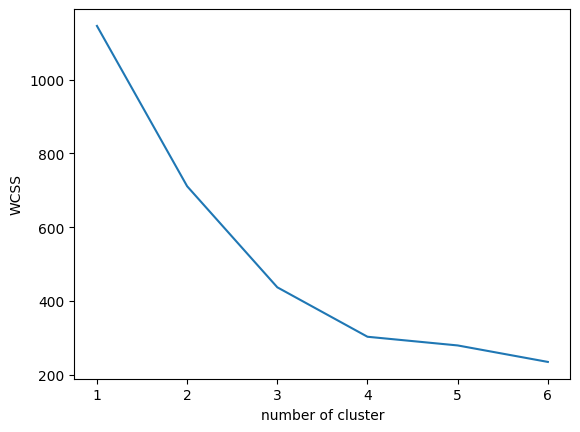

In [81]:
#đồ thị biểu diễn giá trị WCSS (Within-Cluster Sum of Squares) theo số lượng cụm (clusters).
import matplotlib.pyplot as plt
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [82]:
km1=KMeans(n_clusters=4,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([2, 2, 1, 2, 1, 2, 1, 1, 1, 3, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 3, 1, 2, 3, 1, 0, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2,
       3, 1, 3, 1, 2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 3, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 2, 1, 0, 1, 0, 3, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 3, 0, 1, 0, 3, 1, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 1, 1, 2, 2, 1, 1, 1, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0, 3, 3, 2, 2, 2, 1, 3, 0,
       3, 3, 0, 2, 2, 3, 1, 0, 3, 2, 1, 3, 0, 1, 2,

In [ ]:
#áp dụng thuật toán KMeans vào dữ liệu X để phân cụm dữ liệu thành 4 nhóm (hoặc cụm). 
